# Building an Image Classifier with Pytotrch

In [7]:
import torch
import torchvision
import torchvision.transforms.v2 as T
import matplotlib.pyplot as plt

In [2]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

In [3]:
train_valid_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=True, download=True,
    transform = toTensor
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.65MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.2MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.2MB/s]


In [4]:
test_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=False, download=True, transform=toTensor
)

In [5]:
train_data, valid_data = torch.utils.data.random_split(train_valid_data, [55000, 5000])

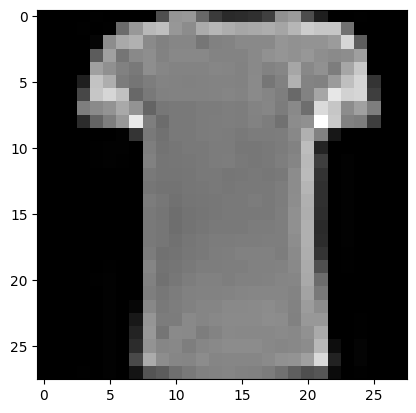

In [18]:
random_index = torch.randint(len(train_data), size=(1,)).item()
plt.imshow(train_data[random_index][0].squeeze(), cmap='gray')
plt.show()

In [19]:
from torch.utils.data import DataLoader

In [20]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)
valid_loader = DataLoader(valid_data, batch_size=32)

In [23]:
X_sample, y_sample = train_data[0]

In [24]:
X_sample.shape

torch.Size([1, 28, 28])

In [26]:
y_sample

6

In [27]:
train_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class ImageClassifier(nn.Module):

    def __init__(self, n_inputs):

        super